In [1]:
%pip install pandas
%pip install numpy
%pip install plotly
%pip install scipy
%pip install matplotlib


import pandas as pd
import numpy as np
import plotly as plt
import plotly.graph_objs as go
import scipy.signal as signal
import matplotlib.pyplot as plt
import time 

from scipy.signal import find_peaks, peak_widths, peak_prominences, chirp

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Determine the peaks.

C:\Users\kodyk\AppData\Local\Temp\ipykernel_23492\577387673.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


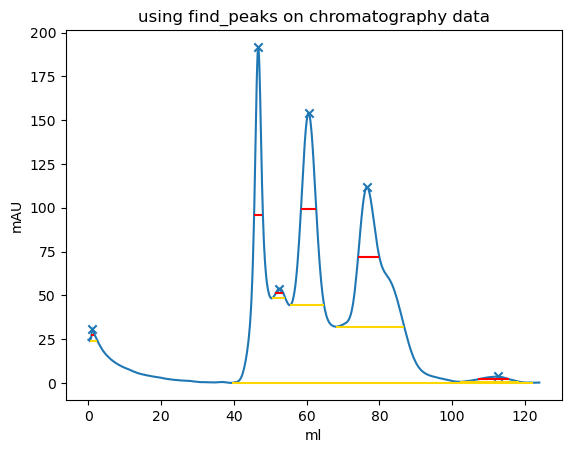

In [2]:

dataframe = pd.read_csv('sampledata\sampledata.csv') #name of file should be as input

#baseline correction

dataframe['mAU'] = dataframe['mAU'] - dataframe['mAU'].min() #subtracts the minimum value of mAU from all values of mAU
# dataframe = dataframe.to_numpy() #converts dataframe to numpy array
# print(dataframe) #prints the dataframe

#@markdown arbitrary. higher = less sensitivity to small peaks, but less noise
min_prominence = 1

fig, ax = plt.subplots()

# alias dataframe columns to x/y for readability
x = dataframe['ml']
y = dataframe['mAU']

peaks, properties = find_peaks(y, prominence=(min_prominence, y.max()), width=0)

# Option 2: Convert index to ml when plotting (I prefer this one)
# This makes the hlines function a little uglier (uses indices to find correct ml values)
ax.plot(x, y)
ax.scatter(x[peaks], y[peaks], marker='x')
ax.hlines(properties['width_heights'],
          x[properties['left_ips'].astype(int)],  ##had to use integer since it is an array and avoid an error
          x[properties['right_ips'].astype(int)], colors='red')

# again with rel_height=1
peaks, properties = find_peaks(y, prominence=(min_prominence, y.max()), width=0, rel_height=1)
ax.hlines(properties['width_heights'],
          x[properties['left_ips'].astype(int)],
          x[properties['right_ips'].astype(int)], colors='gold')
ax.set_xlabel('ml')
ax.set_ylabel('mAU')
ax.set_title('using find_peaks on chromatography data')

fig.show()

# print(x[peaks].astype(int)) #prints the ml values of the peaks
# print(y[peaks].astype(int)) #prints the mAU values of the peaks




For printing the peaks to a csv file:

In [9]:
import csv

timestr = time.strftime("%Y%m%d-%H%M%S")

# Create a list to store the peak data
peak_data = []


# Append the peak data to the list
for i in range(len(peaks)):
    peak_data.append([i+1, x[peaks[i]],y[peaks[i]], properties['widths'][i], properties['prominences'][i]])
    continue 

# Convert the list to a dataframe
peakdata = pd.DataFrame(peak_data, columns=['Peak Number', 'Peak Position','Peak Height', 'Estimated Peak Width', 'Peak Prominence'])
peakdata = peakdata.set_index('Peak Number')
peakdata.to_csv('peakdata' + timestr + '.csv')







Calculating the MW of a hypothetical protein at each peak.

In [10]:
slope = float(input("Enter the slope of the standard curve: ")) #slope of the standard curve
intercept = float(input("Enter the intercept of the standard curve: ")) #intercept of the standard curve

MWdict = {} #dictionary to store the MW of the peaks

for i in range(len(peaks)):
    MW = (x[peaks[i]]-(intercept)) / (slope)  ##need to change this to the standard, the slope is the -5 and the intercept is the 38.69, use the equation y=mx+b from the standard curve to find the MW of the various peaks
    MW = 10 ** MW
    # print(peaks[i], MW)
    MWdict[peaks[i]] = MW #adds the MW to the dictionary

timestr = time.strftime("%Y%m%d-%H%M%S") #creates a timestamp

df_MWdict = pd.DataFrame.from_dict(MWdict, orient='index') #converts the dictionary to a dataframe
df_MWdict.to_csv('molweights' + timestr + '.csv') #saves the dictionary as a csv file

Integrating each peak to determine the amount of protein eluted:

In [50]:
# import numpy as trapz


# for i in range(len(peaks)):
#     area_width = x[peaks][i].astype(int) #creates an array of the ml values of the peaks
#     area_height = y[peaks][i].astype(int) #creates an array of the mAU values of the peaks
#     area = np.trapz(area_height[i], area_width[i]) #calculates the area of the peaks
#     print(area) #prints the area of the peaks


KeyError: 0